## 2-canyon run, high N, f=0.5, longer forcing, PIV, 2 runs in one day

Probe ANK1 upstream and ANK2 downstream, profiler probe P, no dye, probes bent. New profiler (Thanks Douw!) in place using probe P20 (20 cm shaft). Longer forcing time to see if we can get rid of inertial oscillations and smaller f to increase Rossby Radius into narrow canyon regime. Also smaller U to keep values of Rossby number close to Astoria's.
I also did PIV in this runs and I did 2 runs in one day. After the initial 2.5 hour spin up I ran the first experiment. I slowly (over a 15 min period) ramped down tank from $f_2=0.57$ rad/s to $f_0=0.5$ rad/s and let it to rotate for an hour. Then I redid the experiment with the particles that were already in the tank (distribution was better than in the first experiment). I took density profiles before each experiment. 

### Specifics and notes
* 800 g salt into bucket 1
* Douw's profiler.
* P20 is a bit noisy the first time I use the profiler.
Calibration for probes from 02 May 2019 (https://nbviewer.jupyter.org/urls/bitbucket.org/canyonsubc/multipleCanyons/raw/tip/lab/Conduino/Calibration/notebooks/ANK_P20_probes_02may19.ipynb).

### Forcing
* Table profile f0=0.5, t1=21,0 s, f1=0.53, t2=71.0 s, f2=0.57 rad/s.
* Intertial period is $T=2\pi/f$ = 12.56 s, forcing is 1.67T = 21 s

### Stratification

Bucket 1 , 800 g salt

$\rho_1= 1.03090$ g cm$^{-3}$ at 20.042 C 

$\rho_2= 0.99828 $ g cm$^{-3}$ at 20.016 C

Samples at 14:20 hrs from tank water:

$\rho_{bot}= 1.02865$ g cm$^{-3}$ at 20.012 C 

$\rho_{sb}= 1.01672 $ g cm$^{-3}$ at 20.039 C

$\rho_{surface-ish}= 1.00960 $ g cm$^{-3}$ at 20.010 C

Samples at 16:00  hrs from tank water:

$\rho_{bot}= 1.02851$ g cm$^{-3}$ at 20.034 C 

$\rho_{sb}= 1.01701 $ g cm$^{-3}$ at 20.038 C

$\rho_{surface-ish}= 1.00965 $ g cm$^{-3}$ at 20.031 C

### Tank filling
Started: 10:30 hrs, ended: 12:10

### Conduino measurements
Conduino measurements

|time|What for?|file|
|:--:|:-------:|:--:|
|14:27|profile before experiment|profiler.mat|
|14:40|experiment|experiment.mat|
|16:05|profile before experiment|profiler2.mat|
|16:15|experiment|experiment2.mat|


In [2]:
import os
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from numpy.polynomial import polynomial as P
import pandas as pd
#import seaborn as sns
import scipy.io as sio
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
sns.set_style('whitegrid')
sns.set_context('notebook')

In [4]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [5]:
def time_to_dist(time, tot_dep=9.5, omega=0.545, offset=0):
    '''default values: 
    omega = 0.545
    tot_dep = 9.5 cm, total depth the probe travels from surface to bottom
    offset = 0 s, we want to start at the top of the probe cycle.
    RETURNS: time, distance'''
    tt = time-offset
    tot_dep = -9.5 # cm
    A = tot_dep/2 
    B = tot_dep/2 
    omega = 0.545
    dist = A*np.sin(omega*tt-np.pi/2)+B
    return tt, dist

def densP(read):
    ''' Calibration from 02 May 2019 in ANK_P20_probes_02may19.ipynb'''
    fitP = 0.998176+(0.001940*read)+(0.001296*read**2)-(0.000073*read**3)
    return(fitP)

def dens_ANK1(read):
    '''Calibration from 02 May 2019 in ANK_P20_probes_02may19.ipynb'''
    rho_1 = 0.998102+0.004567*read+0.000676*read**2+0.000056*read**3 
    return(rho_1)

def dens_ANK2(read):
    '''Calibration from 02 May 2019 in ANK_P20_probes_02may19.ipynb '''
    rho_2 = 0.997984+0.004090*read+0.001643*read**2+0.000193*read**3 
    return(rho_2)

def plot_uprofile(ax, col='0.8'):
    ax.axvline(21.0, color=col, linestyle=':')
    ax.axvline(71.0, color=col, linestyle=':')
        
def plot_forcing(ax, file, f0, f1, f2, t0, t1):
    '''ax: axes to plot figure on
       file: experiment file to extract time
       f0: Angular velocity of the table during spin up
       f1: f at max forcing
       f2: f to avoid spin down
       t0: time to get to f1
       t1: time to get to f2'''
    mat = sio.loadmat(file, squeeze_me=True)
    time = mat['time']
    t2 = np.round(np.max(time),2) # s

    ax0.text(0.3,0.3,r'$\Delta f_1=$%1.2f rad/s, $\Delta t_1=$%1.1f s' %((f1-f0),t0), transform=ax0.transAxes)
    ax0.text(0.5,0.7,r'$\Delta f_2=$%1.2f rad/s, $\Delta t_2=$%1.1f s' %((f2-f1),(t1-t0)), transform=ax0.transAxes)

    ax0.plot([0,t0,t1,t2],[f0,f1,f2,f2], 'g-')
    ax0.set_ylabel('f table / rad s$^{-1}$')
    ax0.set_xlabel('time / s')

Probes ANK1 upstream and ANK2 downstream. Both near head

|Channel|Probe|
|::|::|
|'ch1':|ANK1|
|'ch2':|ANK2|
|'ch3':|P20|



### Forcing

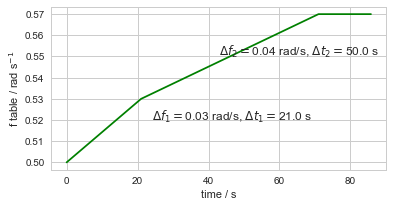

In [6]:
fig, ax0 = plt.subplots(1,1, figsize=(6,3), sharex=True)

f0 = 0.50 # initial f rad/s
f1 = 0.53 # rad/s
f2 = 0.57 # rad/s
t0 = 21.0 # s
t1 = 71.0 # s
exp_file = '../../exp_13jun19/experiment.mat'

plot_forcing(ax0, exp_file, f0, f1, f2, t0, t1)

### All readings 

Text(0.5,0,'time / s')

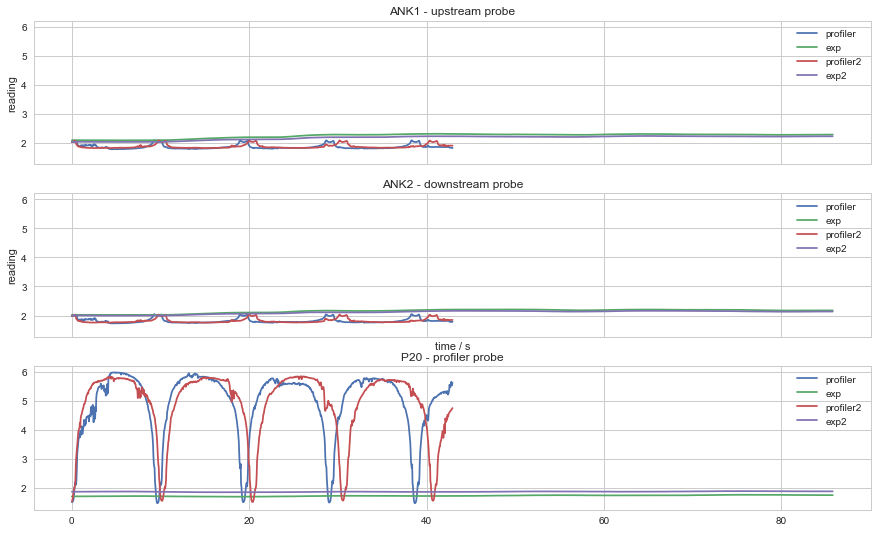

In [8]:
fig, (ax0,ax1, ax2) = plt.subplots(3,1, figsize=(15,9), sharex=True, sharey=True)

labels = [ 'profiler', 'exp', 'profiler2', 'exp2']

filepaths = ['../../exp_13jun19/profiler.mat',
             '../../exp_13jun19/experiment.mat',
             '../../exp_13jun19/profiler2.mat',
             '../../exp_13jun19/experiment2.mat',
             ]

for filepath, lab in zip(filepaths, labels):
    mat = sio.loadmat(filepath, squeeze_me=True)
    P1 = mat['ch1']
    P2 = mat['ch2']
    P3 = mat['ch3']
    time = mat['time']
    ax0.plot(time,P1, label=lab)
    ax1.plot(time,P2, label=lab)
    ax2.plot(time,P3, label=lab)

ax0.legend(bbox_to_anchor=(1,1))
ax1.legend(bbox_to_anchor=(1,1))
ax2.legend(bbox_to_anchor=(1,1))

ax1.set_ylabel('reading')#'density / g cm$^{-3}$')
ax0.set_ylabel('reading')#'density / g cm$^{-3}$')
ax0.set_title('ANK1 - upstream probe')
ax1.set_title('ANK2 - downstream probe')
ax2.set_title('P20 - profiler probe')

ax1.set_xlabel('time / s')

**Drift: Change in density throughout spin up**

### Profiles

(0, 45)

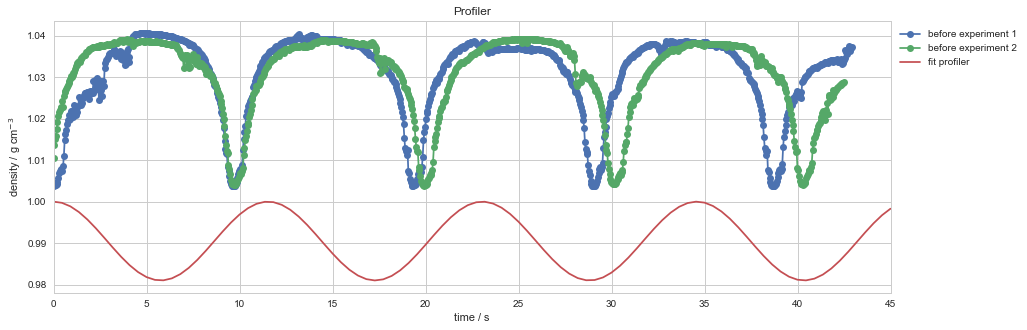

In [24]:
fig, (ax0) = plt.subplots(1,1, figsize=(15,5), sharex=True)
labels=['before experiment 1', 'before experiment 2']

filepaths = ['../../exp_13jun19/profiler.mat',
             '../../exp_13jun19/profiler2.mat',
             ]
ind_offset = [0,10]
for filepath, lab, ind in zip(filepaths, labels, ind_offset):
    mat = sio.loadmat(filepath, squeeze_me=True)
    P3 = mat['ch3']# dens_B(mat['ch1'])
    time = mat['time']
    densP3 = densP(P3)
    
    ax0.plot(time[ind:]-time[ind],densP3[ind:],'o-', label=lab)
tt, dd = time_to_dist(np.linspace(0,45,100))
ax0.plot(tt,dd*0.002+1,'-', label='fit profiler')

ax0.legend(bbox_to_anchor=(1,1))

ax0.set_ylabel('density / g cm$^{-3}$')
ax0.set_title('Profiler')
ax0.set_xlabel('time / s')
ax0.set_xlim(0,45)

### Experiment

../../exp_13jun19/experiment.mat
../../exp_13jun19/experiment2.mat


Text(0.5,0,'sample')

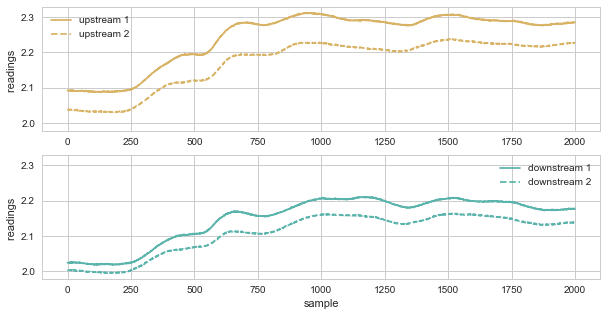

In [16]:
fig, (ax0,ax1) = plt.subplots(2,1, figsize=(10,5), sharey=True)
labels = [['upstream 1','downstream 1'],['upstream 2', 'downstream 2']]
colors = ['#d8b365','#5ab4ac']
linestyles = ['-', '--']
files = ['../../exp_13jun19/experiment.mat',
         '../../exp_13jun19/experiment2.mat']

for filepath, lab, sty in zip(files, labels, linestyles):
    print(filepath)
    mat = sio.loadmat(filepath, squeeze_me=True)
    P1 = mat['ch1']
    P2 = mat['ch2']
    time = mat['time']
    ax0.plot(P1,'-', label=lab[0], color=colors[0], linestyle=sty)
    ax1.plot(P2,'-', label=lab[1], color=colors[1], linestyle=sty)
ax0.legend(loc=0)
ax1.legend(loc=0)
ax0.set_ylabel('readings ')
ax1.set_ylabel('readings ')
ax1.set_xlabel('sample')

../../exp_13jun19/experiment.mat
../../exp_13jun19/experiment2.mat


Text(0.5,1,'Probe density')

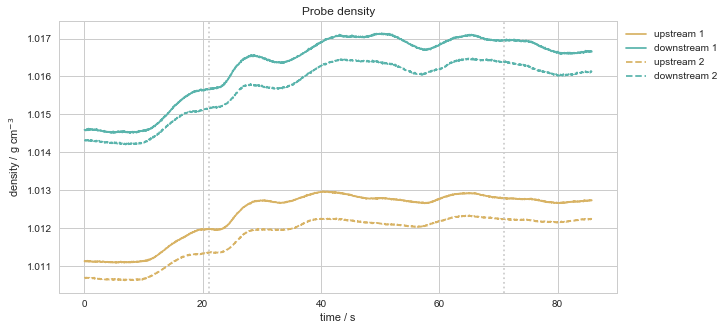

In [19]:
fig, ax0 = plt.subplots(1,1, figsize=(10,5), sharey=True)
labels = [['upstream 1','downstream 1'],['upstream 2', 'downstream 2']]
colors = ['#d8b365','#5ab4ac']
linestyles = ['-', '--']
files = ['../../exp_13jun19/experiment.mat',
         '../../exp_13jun19/experiment2.mat']

for filepath, lab, sty in zip(files, labels, linestyles):
    print(filepath)
    mat = sio.loadmat(filepath, squeeze_me=True)
    P1 = mat['ch1']
    P2 = mat['ch2']
    time = mat['time']
    ax0.plot(time,dens_ANK1(P1),'-', label=lab[0], color=colors[0], linestyle=sty)
    ax0.plot(time,dens_ANK2(P2),'-', label=lab[1], color=colors[1], linestyle=sty)

plot_uprofile(ax0)
ax0.legend(bbox_to_anchor=(1,1))
ax0.set_ylabel('density / g cm$^{-3}$')
ax0.set_xlabel('time / s')
ax0.set_title('Probe density')


../../exp_13jun19/experiment.mat
../../exp_13jun19/experiment2.mat


Text(0.5,1,'Probe density minus initial density')

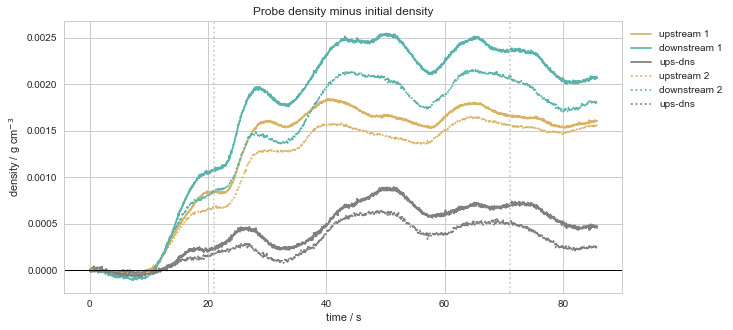

In [22]:
fig, (ax0) = plt.subplots(1,1, figsize=(10,5), sharey=True)

labels = [['upstream 1','downstream 1'],['upstream 2', 'downstream 2']]
colors = ['#d8b365','#5ab4ac']
linestyles = ['-', ':']
files = ['../../exp_13jun19/experiment.mat',
         '../../exp_13jun19/experiment2.mat']

for filepath, lab, sty in zip(files, labels, linestyles):
    print(filepath)
    mat = sio.loadmat(filepath, squeeze_me=True)
    P1 = mat['ch1']
    P2 = mat['ch2']
    time = mat['time']
    ax0.plot(time,dens_ANK1(P1)-dens_ANK1(P1)[0],'-', label=lab[0], color=colors[0], linestyle=sty)
    ax0.plot(time,dens_ANK2(P2)-dens_ANK2(P2)[0],'-', label=lab[1], color=colors[1], linestyle=sty)
    ax0.plot(time,dens_ANK2(P2)-dens_ANK2(P2)[0]-(dens_ANK1(P1)-dens_ANK1(P1)[0]),'-', label='ups-dns',linestyle=sty, color='0.5')

plot_uprofile(ax0)
ax0.axhline(0,color='k', linewidth=1)
ax0.legend(bbox_to_anchor=(1,1))
ax0.set_ylabel('density / g cm$^{-3}$')
ax0.set_xlabel('time / s')
ax0.set_title('Probe density minus initial density')
